# K-Means Clustering on Mall Customer Segmentation Dataset

The dataset is from [Kaggle Mall Customer Segmentation](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

The purpose is this project is to cluster customer groups based on age, gender and income.

Customer segmentations can be useful to businesses for targeted marketing that will improve cost effectiveness.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read data and Cleaning

Datasets uploaded on Kaggle are generally already cleaned. Therefore, little data wrangling has to be carried out.

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The dataset holds no null values, so we can proceed with exploratory data analysis.

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Visualizing the data features

The column `Gender` is a discrete variable. A bar plot is used to visualize the number of data points by each gender.

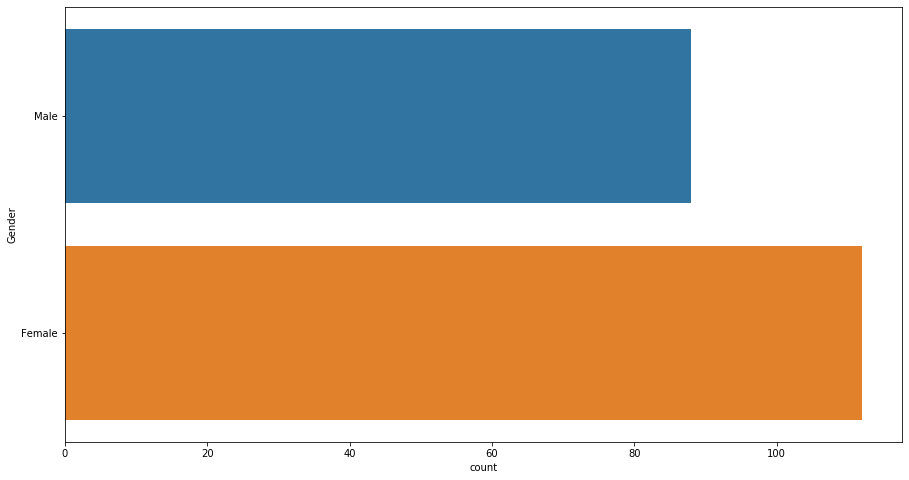

In [7]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
sns.countplot(y='Gender', data=data);

## Distribution plots of each continuous feature

A function is created to visualize the distributions of continuous variables. All plots show a normal distribution.

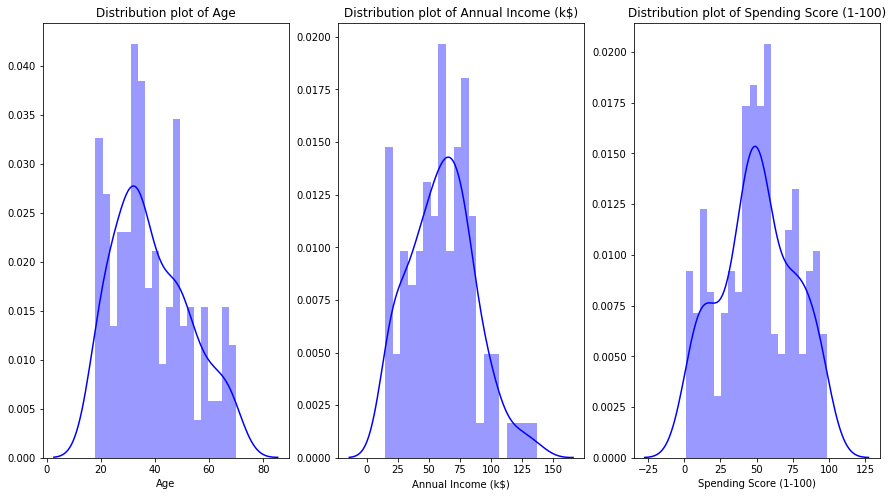

In [8]:
def distribution_plot(df):
    n = 0
    for column in df.columns:
        n += 1
        plt.subplot(1 , 3, n)
        sns.distplot(df[column] , bins = 20, color='blue')
        plt.title('Distribution plot of {}'.format(column))
    return plt.show()

df = data.drop(columns=['Gender', 'CustomerID'])

distribution_plot(df)

## Distribution of target array

This is an important visualization as it gives an overview of the sepending score for the mall. The most common group lies in the 35-60 range. 

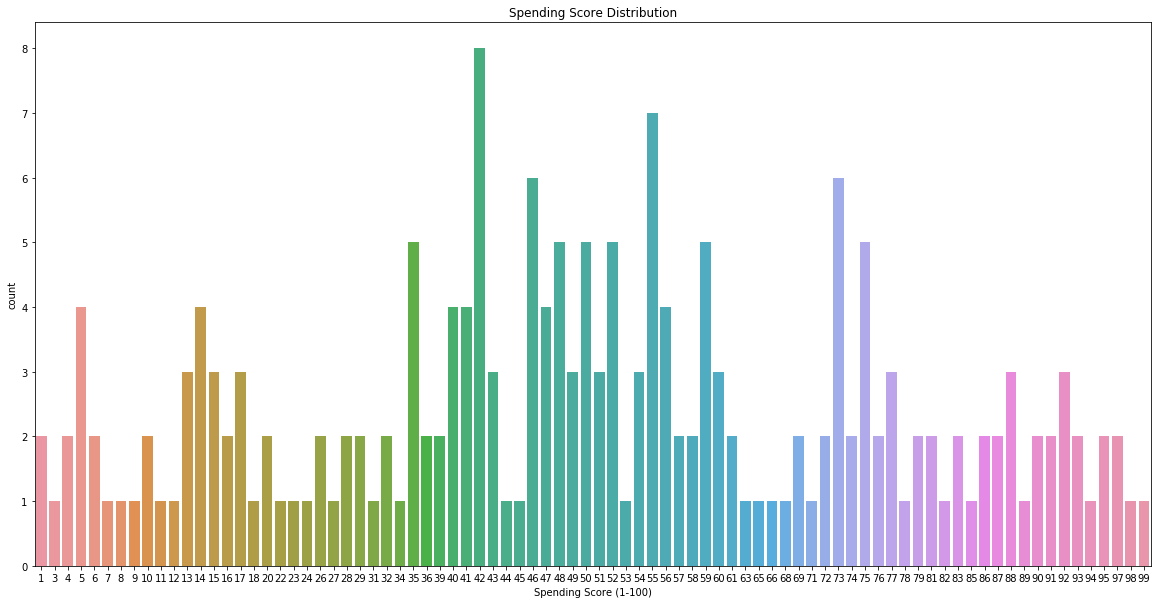

In [26]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['Spending Score (1-100)'])
plt.title("Spending Score Distribution");

## Visualizing correlations

Based on the heatmap, there is no specific correlation that stands out. Hence, the model will have to consider all models when clustering.

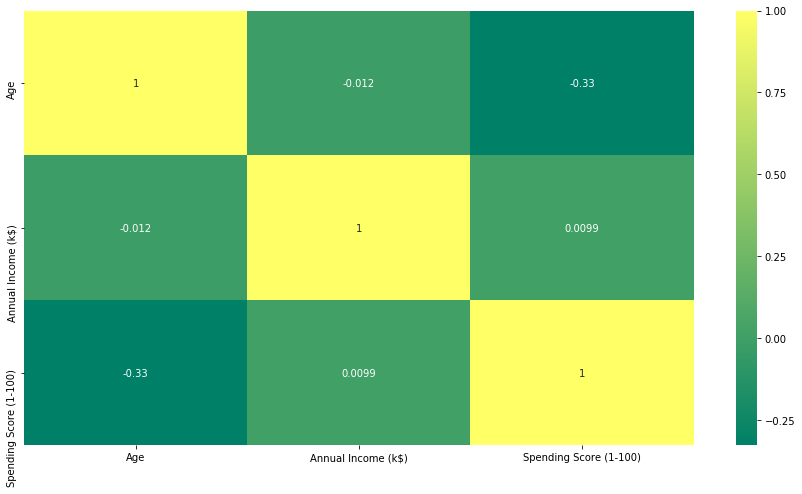

In [10]:
heatmap_data = data.drop(columns='CustomerID')

sns.heatmap(heatmap_data.corr(), cmap='summer', annot=True);

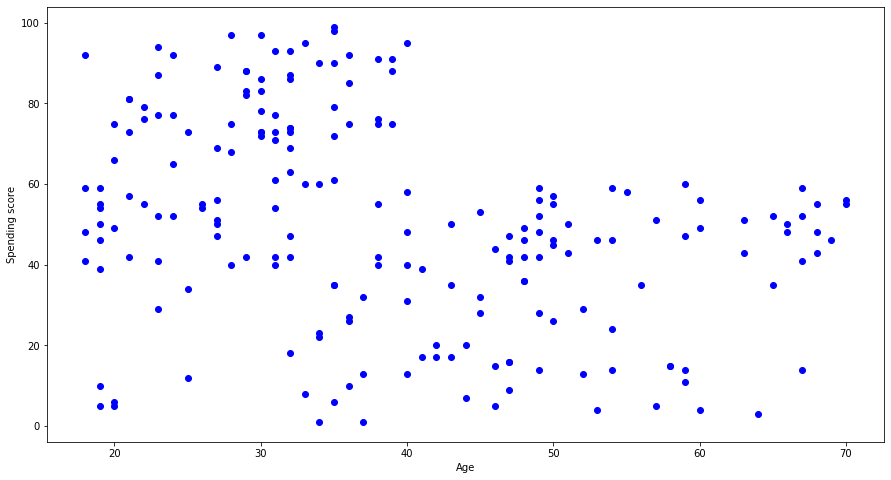

In [11]:
plt.scatter(x=data['Age'], y=data['Spending Score (1-100)'], c='blue')
plt.xlabel('Age'), plt.ylabel('Spending score');

The scatter plot shows that mainly people under 40 years of age populate the group with spending score of more than 60.


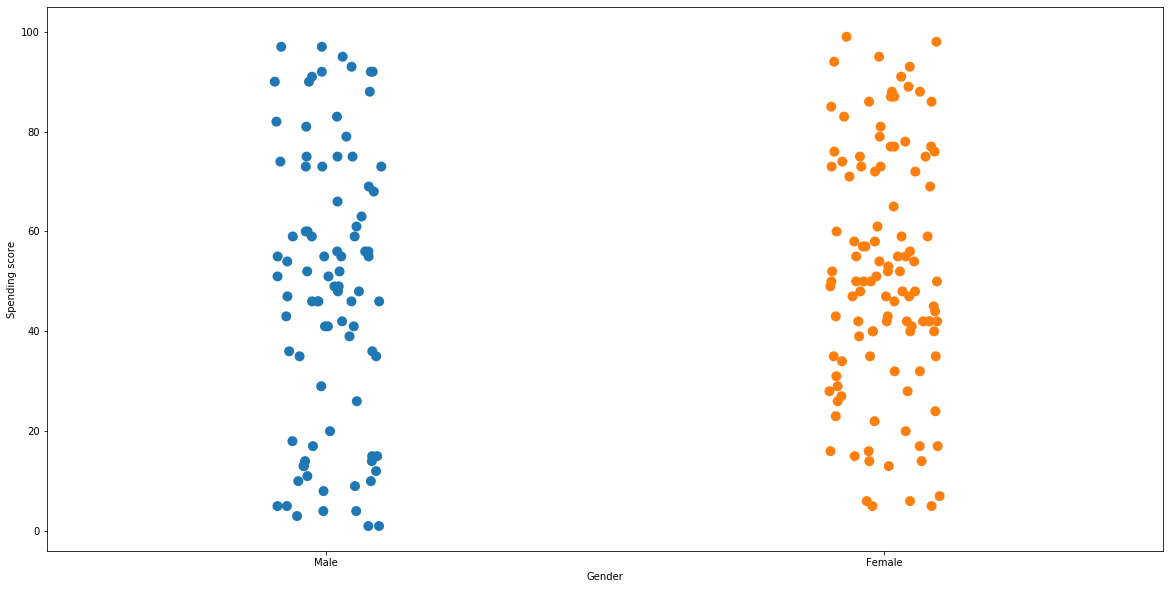

In [28]:
sns.stripplot(x=data['Gender'], y=data['Spending Score (1-100)'], c='blue', size=10)
plt.xlabel('Gender'), plt.ylabel('Spending score');

Based on this plot, there are no specific characteristic that stands out based on the `Gender` feature that might play a big role in our clustering model.


## K-Means Clustering and the Elbow Method

In order to select the optimal number of clusters, the elbow method is used.

The function `distribution_curve` is defined such that it plots the distortion curve for each combination of feature and the target array. From the curve, we are able to determine the optimal number of clusters.

In [13]:
from sklearn.cluster import KMeans

def distortion_curve(arr):
    distortion = []
    
    for n in range(1,11):
        kmeans = KMeans(n_clusters=n, init='k-means++', n_jobs=-1)
        kmeans.fit(arr)
        distortion.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12 ,6))
    plt.scatter(np.arange(1 , 11), distortion)
    plt.plot(np.arange(1 , 11), distortion, '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    return plt.show();

The first feature to be applied in the K-Means algorithm is the `age`.

From the curve, we can see that 5 is the optimal number of cluster. Anything beyond 5 clusters will give us insignificant improvement.

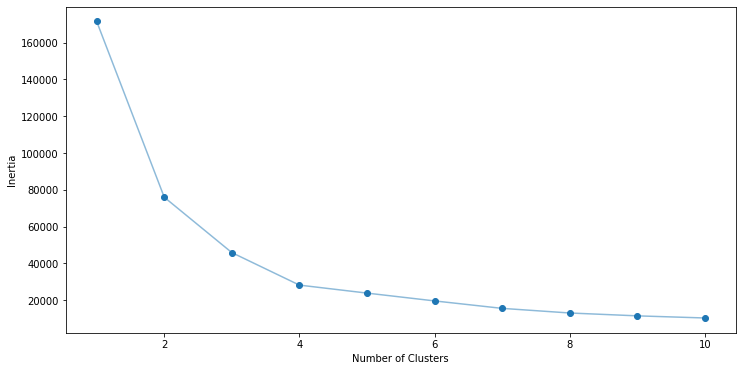

In [14]:
age_score = df[['Age', 'Spending Score (1-100)']].values

distortion_curve(age_score)

Next feature is the `Annual Income`.

Similar to `Age`, the optimal number of clusters is 5.

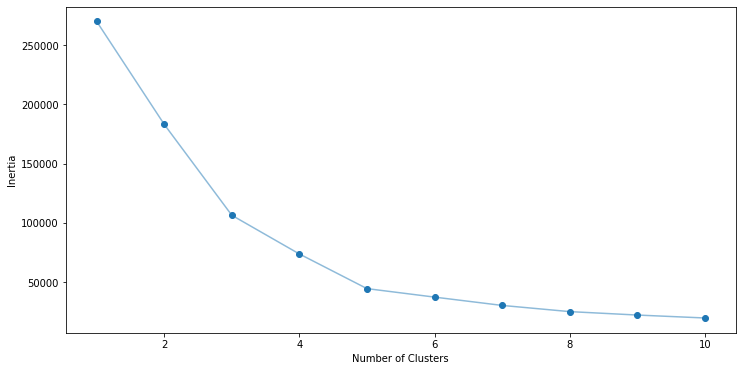

In [15]:
income_score = data[['Annual Income (k$)' ,'Spending Score (1-100)']].values

distortion_curve(income_score)

## Visualizing the clusters

For the visualization of the clusters, the function `cluster_visual` is defined such that it will plot the clusters when the feature and target array `arr`, number of clusters `n`, the title of the plot `title`, and the label of x-axis `xlabel` are passed.

In [63]:
def cluster_visual(arr, n, title, xlabel):
    kmeans = KMeans(n_clusters=n).fit(arr)

    x,y = age_score[:, 0], age_score[:, 1]
    # plot data
    colormap='jet'
    plt.figure(1 , figsize = (12 ,6))
    plt.scatter(arr[:, 0], arr[:, 1], c=kmeans.labels_, s=350, cmap=colormap, edgecolors='grey')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', 
                linewidths=4, cmap=colormap)
    plt.title(title)
    plt.xlabel(xlabel), plt.ylabel("Spending Score")

    plt.grid(True)
    return plt.show();

## Conclusion

### Age Clusters

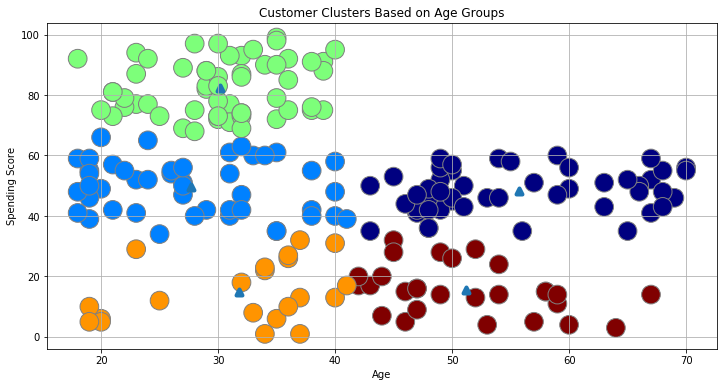

In [64]:
cluster_visual(age_score, 5, 'Customer Clusters Based on Age Groups', 'Age')

Based on the cluster visuals for `Age`, we can observe that the customers can be segmented into 5 clusters:
    
`Green` shows the Loyal customers. The correct course of action to keep these customers satisfiedis perhaps to begin a reward program.

`Light blue` shows the young target customer group. Targeted marketing might help push this group to the `Green` group.

`Dark blue` shows the older target customer group. Targeted marketing and introducing a new loyalty or membership program for customers above the age of 40 might help push their spending score above 60.

`Orange` and `Dark Red` group are regular customers. These group could be subjected to promotions by the mall in order to push up their scores.

###  Annual Income Clusters

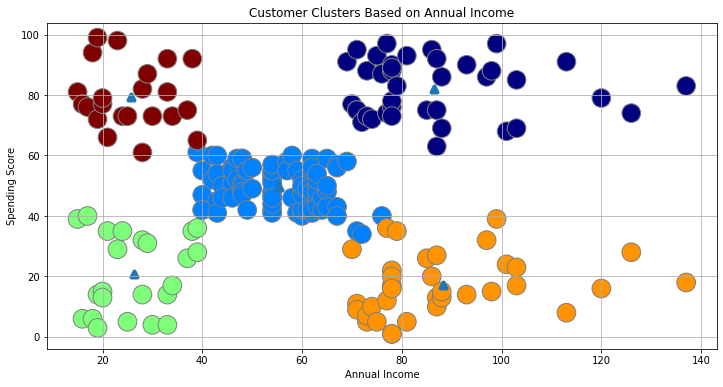

In [65]:
cluster_visual(income_score, 5, 'Customer Clusters Based on Annual Income', 'Annual Income')

Based on the cluster visuals for `Annual Income`, we can observe that the customers can also be segmented into 5 clusters.

The target group would be the `Light blue` group. The mall can deploy both a promotion scheme targeted to this specific group and loyalty program to push their spending scores up.